# Analyzing Police Activity with pandas
## 1. Preparing the data for analysis
### Stanford Open Policing Project dataset
#### Examining the dataset


In [1]:
# Import the pandas library as pd
import pandas as pd

In [13]:
# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv', nrows=50000, low_memory=False)

In [14]:
ri.head()


,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [15]:
# Count the number of missing values in each column
ri.isnull().sum()


state                     0
stop_date                 0
stop_time                 0
county_name           50000
driver_gender          3052
driver_race            3050
violation_raw          3050
violation              3050
search_conducted          0
search_type           47922
stop_outcome           3050
is_arrested            3050
stop_duration          3050
drugs_related_stop        0
district                  0
dtype: int64

#### Dropping columns

In [16]:
# Drop all rows that are missing 'driver_gender'
print(ri.shape)


(50000, 15)


In [17]:
ri.drop(['county_name', 'state'], axis='columns', inplace=True)


In [18]:
# Examine the shape of the DataFrame
print(ri.shape)


(50000, 13)


#### Dropping rows

In [19]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)


In [20]:
# Count the number of missing values in each column (again)
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           44870
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


In [21]:
# Examine the shape of the DataFrame
print(ri.shape)

(46948, 13)


### Using proper data types

In [22]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object


In [23]:
# Check the data type of 'is_arrested'
print(ri.is_arrested.dtype)

object


In [24]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [25]:
# Check the data type of 'is_arrested' (again)
print(ri.is_arrested.dtype)

bool


### Creating a DatetimeIndex
#### Combining object columns


In [26]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

In [28]:
combined.head()

0    2005-01-04 12:55
1    2005-01-23 23:15
2    2005-02-17 04:15
3    2005-02-20 17:15
4    2005-02-24 01:20
Name: stop_date, dtype: object

In [29]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [30]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [31]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

In [32]:
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2011-05-31 00:23:00', '2011-05-31 00:35:00',
               '2011-05-31 03:56:00', '2011-05-31 06:32:00',
               '2011-05-31 06:38:00', '2011-05-31 06:42:00',
               '2011-05-31 06:51:00', '2011-05-31 06:57:00',
               '2011-05-31 07:08:00', '2011-05-31 07:39:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=46948, freq=None)

In [33]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

## 2. Exploring the relationship between gender and policing
### Do the genders commit different violations?
#### Examining traffic violations


In [34]:
ri.violation.value_counts()

Speeding               30918
Moving violation        7574
Equipment               3841
Other                   2816
Registration/plates     1799
Name: violation, dtype: int64

In [35]:
ri.violation.value_counts(normalize=True)

Speeding               0.658558
Moving violation       0.161327
Equipment              0.081814
Other                  0.059981
Registration/plates    0.038319
Name: violation, dtype: float64

#### Comparing violations by gender


In [39]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender=='F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender=='M']


In [40]:
# Compute the violations by female drivers (as proportions)
female.violation.value_counts(normalize=True)


Speeding               0.767315
Moving violation       0.105052
Equipment              0.060453
Registration/plates    0.039154
Other                  0.028025
Name: violation, dtype: float64

In [41]:
# Compute the violations by male drivers (as proportions)
male.violation.value_counts(normalize=True)

Speeding               0.619142
Moving violation       0.181723
Equipment              0.089556
Other                  0.071563
Registration/plates    0.038016
Name: violation, dtype: float64

#### Comparing speeding outcomes by gender


In [42]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender=='F') & (ri.violation=='Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender=='M') & (ri.violation=='Speeding')]

In [43]:
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))


Citation            0.978191
Warning             0.013044
Arrest Driver       0.006470
N/D                 0.001461
Arrest Passenger    0.000730
No Action           0.000104
Name: stop_outcome, dtype: float64


In [44]:
# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.964800
Arrest Driver       0.018655
Warning             0.013124
Arrest Passenger    0.001312
N/D                 0.001266
No Action           0.000844
Name: stop_outcome, dtype: float64


### Does gender affect whose vehicle is searched?
#### Calculating the search rate



In [45]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)


bool


In [46]:
# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

False    0.955738
True     0.044262
Name: search_conducted, dtype: float64


In [47]:
# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

0.04426173638919656


#### Comparing search rates by gender


In [48]:
# Calculate the search rate for female drivers
ri[ri.driver_gender=='F'].search_conducted.mean()

0.02330050444391064

In [49]:
ri[ri.driver_gender=='M'].search_conducted.mean()

0.05185873066542848

In [50]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.023301
M    0.051859
Name: search_conducted, dtype: float64

#### Adding a second factor to the analysis


In [52]:
# Calculate the search rate for each combination of gender and violation
ri.groupby(['driver_gender', 'violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.087417
               Moving violation       0.052591
               Other                  0.062857
               Registration/plates    0.087935
               Speeding               0.009496
M              Equipment              0.110175
               Moving violation       0.071543
               Other                  0.053528
               Registration/plates    0.154962
               Speeding               0.031123
Name: search_conducted, dtype: float64

In [53]:
# Reverse the ordering to group by violation before gender
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.087417
                     M                0.110175
Moving violation     F                0.052591
                     M                0.071543
Other                F                0.062857
                     M                0.053528
Registration/plates  F                0.087935
                     M                0.154962
Speeding             F                0.009496
                     M                0.031123
Name: search_conducted, dtype: float64

### Does gender affect who is frisked during a search?
#### Counting protective frisks


In [54]:
# Count the 'search_type' values
ri.search_type.value_counts()

Incident to Arrest                                          918
Probable Cause                                              438
Reasonable Suspicion                                        134
Protective Frisk                                            128
Inventory                                                   120
Incident to Arrest,Inventory                                 87
Incident to Arrest,Probable Cause                            62
Incident to Arrest,Protective Frisk                          32
Probable Cause,Reasonable Suspicion                          24
Probable Cause,Protective Frisk                              23
Incident to Arrest,Inventory,Probable Cause                  23
Incident to Arrest,Inventory,Protective Frisk                18
Protective Frisk,Reasonable Suspicion                        15
Inventory,Protective Frisk                                   12
Incident to Arrest,Probable Cause,Protective Frisk           11
Inventory,Probable Cause                

In [55]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)


In [56]:
ri.frisk.dtype

dtype('bool')

In [57]:
ri.frisk.sum()

248

#### Comparing frisk rates by gender

In [58]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted]


In [59]:
# Calculate the overall frisk rate by taking the mean of 'frisk'
searched.frisk.mean()


0.11934552454282965

In [60]:
# Calculate the frisk rate for each gender
searched.groupby('driver_gender').frisk.mean()

driver_gender
F    0.085911
M    0.124790
Name: frisk, dtype: float64

## 3. Visual exploratory data analysis
### Does time of day affect arrest rate?
#### Calculating the hourly arrest rate


In [61]:
# Calculate the overall arrest rate
ri.is_arrested.mean()



0.03878759478572037

In [62]:
# Calculate the hourly arrest rate
ri.groupby(ri.index.hour).is_arrested.mean()


stop_datetime
0     0.051939
1     0.072084
2     0.070883
3     0.057451
4     0.043750
5     0.024793
6     0.012378
7     0.013889
8     0.021313
9     0.026927
10    0.032196
11    0.033507
12    0.039187
13    0.033462
14    0.033137
15    0.037037
16    0.041710
17    0.047619
18    0.043118
19    0.035601
20    0.037968
21    0.067925
22    0.058957
23    0.045533
Name: is_arrested, dtype: float64

In [63]:
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

#### Plotting the hourly arrest rate


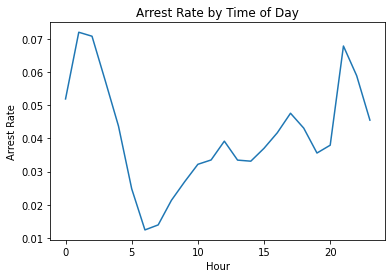

In [64]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

#### Are drug-related stops on the rise?


In [65]:
# Calculate the annual rate of drug-related stops
ri.drugs_related_stop.resample('A').mean()

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.012802
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [67]:
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()


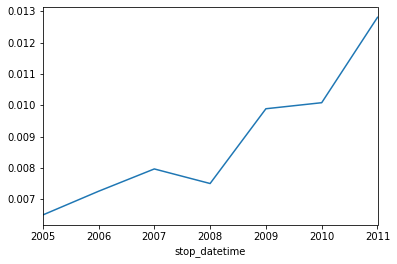

In [68]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

#### Comparing drug and search rates


In [69]:
annual_search_rate = ri.search_conducted.dropna().astype('int').resample('A').mean()

In [70]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

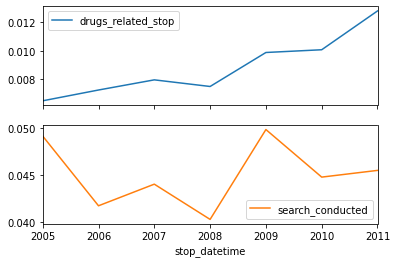

In [71]:
# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

#### Tallying violations by district


In [72]:
pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,522,902,271,95,5257
Zone K2,483,1166,588,351,5812
Zone K3,807,1064,478,320,7602
Zone X1,95,337,74,11,683
Zone X3,483,1335,410,259,5183
Zone X4,1451,2770,995,763,6381


In [73]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

In [75]:
# Select rows 'Zone K1' through 'Zone K3'
all_zones.loc['Zone K1':'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,522,902,271,95,5257
Zone K2,483,1166,588,351,5812
Zone K3,807,1064,478,320,7602


In [76]:
k_zones = all_zones.loc['Zone K1':'Zone K3']


#### Plotting violations by district


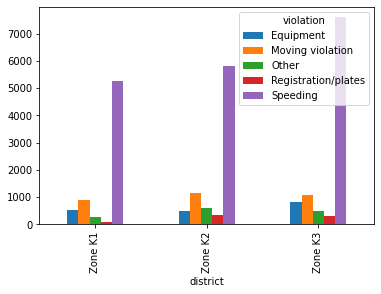

In [78]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

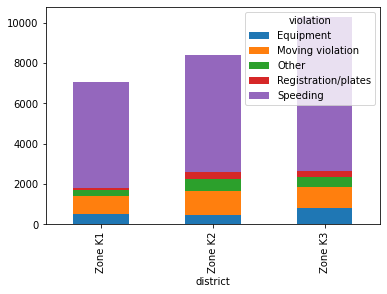

In [79]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

### How long might you be stopped for a violation?
#### Converting stop durations to numbers


In [81]:
# Print the unique values in 'stop_duration'
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [82]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min':23, '30+ Min': 45}


In [83]:
# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)


In [84]:
# Print the unique values in 'stop_minutes'
ri.stop_minutes.unique()

array([ 8, 23, 45])

#### Plotting stop length


In [85]:
ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 22.260000
Call for Service                    25.193922
Equipment/Inspection Violation      13.788857
Motorist Assist/Courtesy            18.193277
Other Traffic Violation             15.999604
Registration Violation              16.798221
Special Detail/Directed Patrol      15.907778
Speeding                            11.053011
Suspicious Person                   17.433333
Violation of City/Town Ordinance    13.820513
Warrant                             30.222222
Name: stop_minutes, dtype: float64

In [86]:
# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

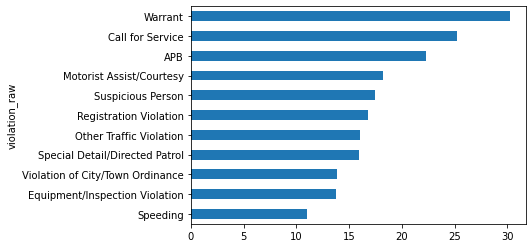

In [87]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

## 4.Analyzing the effect of weather on policing
### Exploring the weather dataset
#### Plotting the temperature

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('weather.csv')
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [93]:
# Describe the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


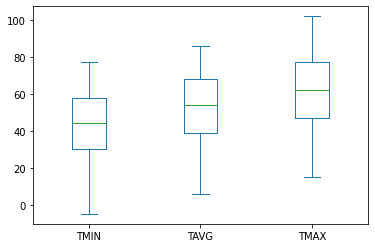

In [94]:
# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

#### Plotting the temperature difference


In [98]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
weather['TDIFF'].describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

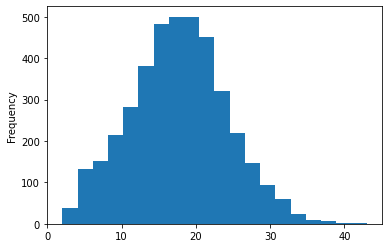

In [99]:
# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

### Categorizing the weather
#### Counting bad weather conditions


In [105]:
WT = weather.loc[:, 'WT01':'WT22']
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [101]:
# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

In [106]:
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,2
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16,2
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9,3
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6,4
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,15,4


In [102]:
# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

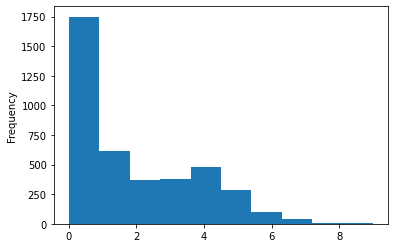

In [103]:
# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

#### Rating the weather conditions


In [107]:
# Count the unique values in 'bad_conditions' and sort the index
weather.bad_conditions.value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [108]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

In [109]:
# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)
# Count the unique values in 'rating'
print(weather.rating.value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


#### Changing the data type to category


In [110]:
cats = ['good', 'bad', 'worse']

In [112]:
# Change the data type of 'rating' to category. 
#*) As for now it is depricated
# weather['rating'] = weather.rating.astype('category', ordered=True, categories=cats)
# New, recommended style
weather['rating'] = pd.Categorical(weather['rating'], ordered=True, categories=cats)
# Examine the head of 'rating'
weather.rating.head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

### Merging datasets
#### Preparing the DataFrames

In [115]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

In [116]:
# Examine the head of 'ri'
ri.head()

,index,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
1,1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
2,2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
3,3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23
4,4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8


In [119]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

In [118]:
# Examine the head of 'weather_rating'
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


#### Merging the DataFrames

In [120]:
# Examine the shape of 'ri'
ri.shape

(46948, 17)

In [121]:
# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

In [123]:
ri_weather.head()

,index,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
0,0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,2005-01-04,bad
1,1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8,2005-01-23,worse
2,2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,2005-02-17,good
3,3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23,2005-02-20,bad
4,4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8,2005-02-24,bad


In [122]:
# Examine the shape of 'ri_weather'
ri_weather.shape

(46948, 19)

In [124]:
# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

### Does weather affect the arrest rate?
#### Comparing arrest rates by weather rating

In [125]:
ri_weather.is_arrested.mean()

0.03878759478572037

In [126]:
ri_weather.groupby('rating').is_arrested.mean()

rating
good     0.035754
bad      0.040438
worse    0.041838
Name: is_arrested, dtype: float64

In [128]:
ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

violation            rating
Equipment            good      0.079420
                     bad       0.096379
                     worse     0.099853
Moving violation     good      0.064429
                     bad       0.074097
                     worse     0.067361
Other                good      0.066351
                     bad       0.096916
                     worse     0.062300
Registration/plates  good      0.130312
                     bad       0.136654
                     worse     0.119355
Speeding             good      0.016222
                     bad       0.015642
                     worse     0.016547
Name: is_arrested, dtype: float64

#### Selecting from a multi-indexed Series


In [129]:
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()


In [130]:
arrest_rate

violation            rating
Equipment            good      0.079420
                     bad       0.096379
                     worse     0.099853
Moving violation     good      0.064429
                     bad       0.074097
                     worse     0.067361
Other                good      0.066351
                     bad       0.096916
                     worse     0.062300
Registration/plates  good      0.130312
                     bad       0.136654
                     worse     0.119355
Speeding             good      0.016222
                     bad       0.015642
                     worse     0.016547
Name: is_arrested, dtype: float64

In [131]:
arrest_rate.loc['Moving violation', 'bad']

0.07409733124018839

In [132]:
arrest_rate.loc['Speeding']

rating
good     0.016222
bad      0.015642
worse    0.016547
Name: is_arrested, dtype: float64

#### Reshaping the arrest rate data


In [133]:
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.079420,0.096379,0.099853
Moving violation,0.064429,0.074097,0.067361
Other,0.066351,0.096916,0.062300
Registration/plates,0.130312,0.136654,0.119355
Speeding,0.016222,0.015642,0.016547


In [134]:
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.079420,0.096379,0.099853
Moving violation,0.064429,0.074097,0.067361
Other,0.066351,0.096916,0.062300
Registration/plates,0.130312,0.136654,0.119355
Speeding,0.016222,0.015642,0.016547
